# 从GRIB2文件中获取要素场

本示例的文件保存在CMA-PI高性能计算机，请在CMA-PI上运行或修改为本地文件路径。

从 GRAPES GFS 的 GRIB 2 数据中读取 850hPa 温度场。

In [6]:
from nwpc_data.grib import load_field_from_file

t = load_field_from_file(
    file_path="/g1/COMMONDATA/OPER/NWPC/GRAPES_GFS_GMF/Prod-grib/2020031721/ORIG/gmf.gra.2020031800105.grb2",
    parameter="t",
    level_type="isobaricInhPa",
    level=850
)
t

<xarray.DataArray 't' (latitude: 720, longitude: 1440)>
[1036800 values with dtype=float32]
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
    isobaricInhPa  int64 ...
  * latitude       (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] ...
Attributes:
    GRIB_paramId:                             130
    GRIB_shortName:                           t
    GRIB_units:                               K
    GRIB_name:                                Temperature
    GRIB_cfName:                              air_temperature
    GRIB_cfVarName:                           t
    GRIB_dataType:                            fc
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      1036800
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_gridDefinitionDescription:           Latitude/longitude 
    GRIB_Nx:                                  1440
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.75
    GRIB_Ny:                                  720
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   89.875
    GRIB_latitudeOfLastGridPointInDegrees:    -89.875
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

使用 850hPa 温度场绘制填充图

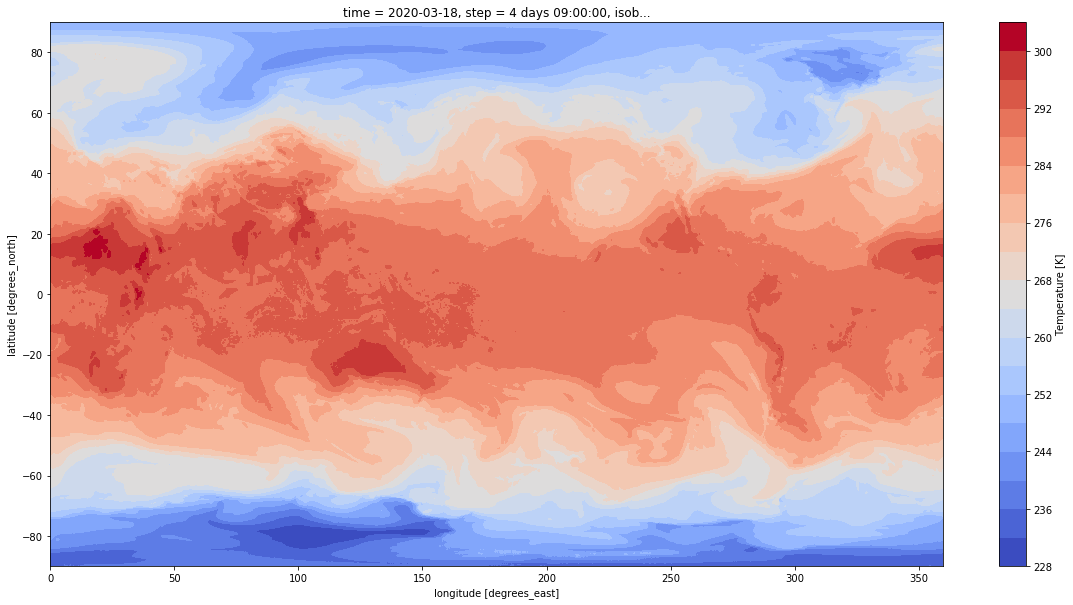

In [2]:
t.plot.contourf(size=10, aspect=2, cmap="coolwarm", levels=20)

省略`level`参数会加载所有层次，下面代码加载所有等压面层的温度场

In [7]:
tset = load_field_from_file(
    file_path="/g1/COMMONDATA/OPER/NWPC/GRAPES_GFS_GMF/Prod-grib/2020031721/ORIG/gmf.gra.2020031800105.grb2",
    parameter="t",
    level_type="isobaricInhPa",
)
tset

<xarray.DataArray 't' (isobaricInhPa: 36, latitude: 720, longitude: 1440)>
[37324800 values with dtype=float32]
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 850 ... 5 4 3 2 1
  * latitude       (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] ...
Attributes:
    GRIB_paramId:                             130
    GRIB_shortName:                           t
    GRIB_units:                               K
    GRIB_name:                                Temperature
    GRIB_cfName:                              air_temperature
    GRIB_cfVarName:                           t
    GRIB_dataType:                            fc
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      1036800
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_gridDefinitionDescription:           Latitude/longitude 
    GRIB_Nx:                                  1440
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.75
    GRIB_Ny:                                  720
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   89.875
    GRIB_latitudeOfLastGridPointInDegrees:    -89.875
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

批量绘制图形

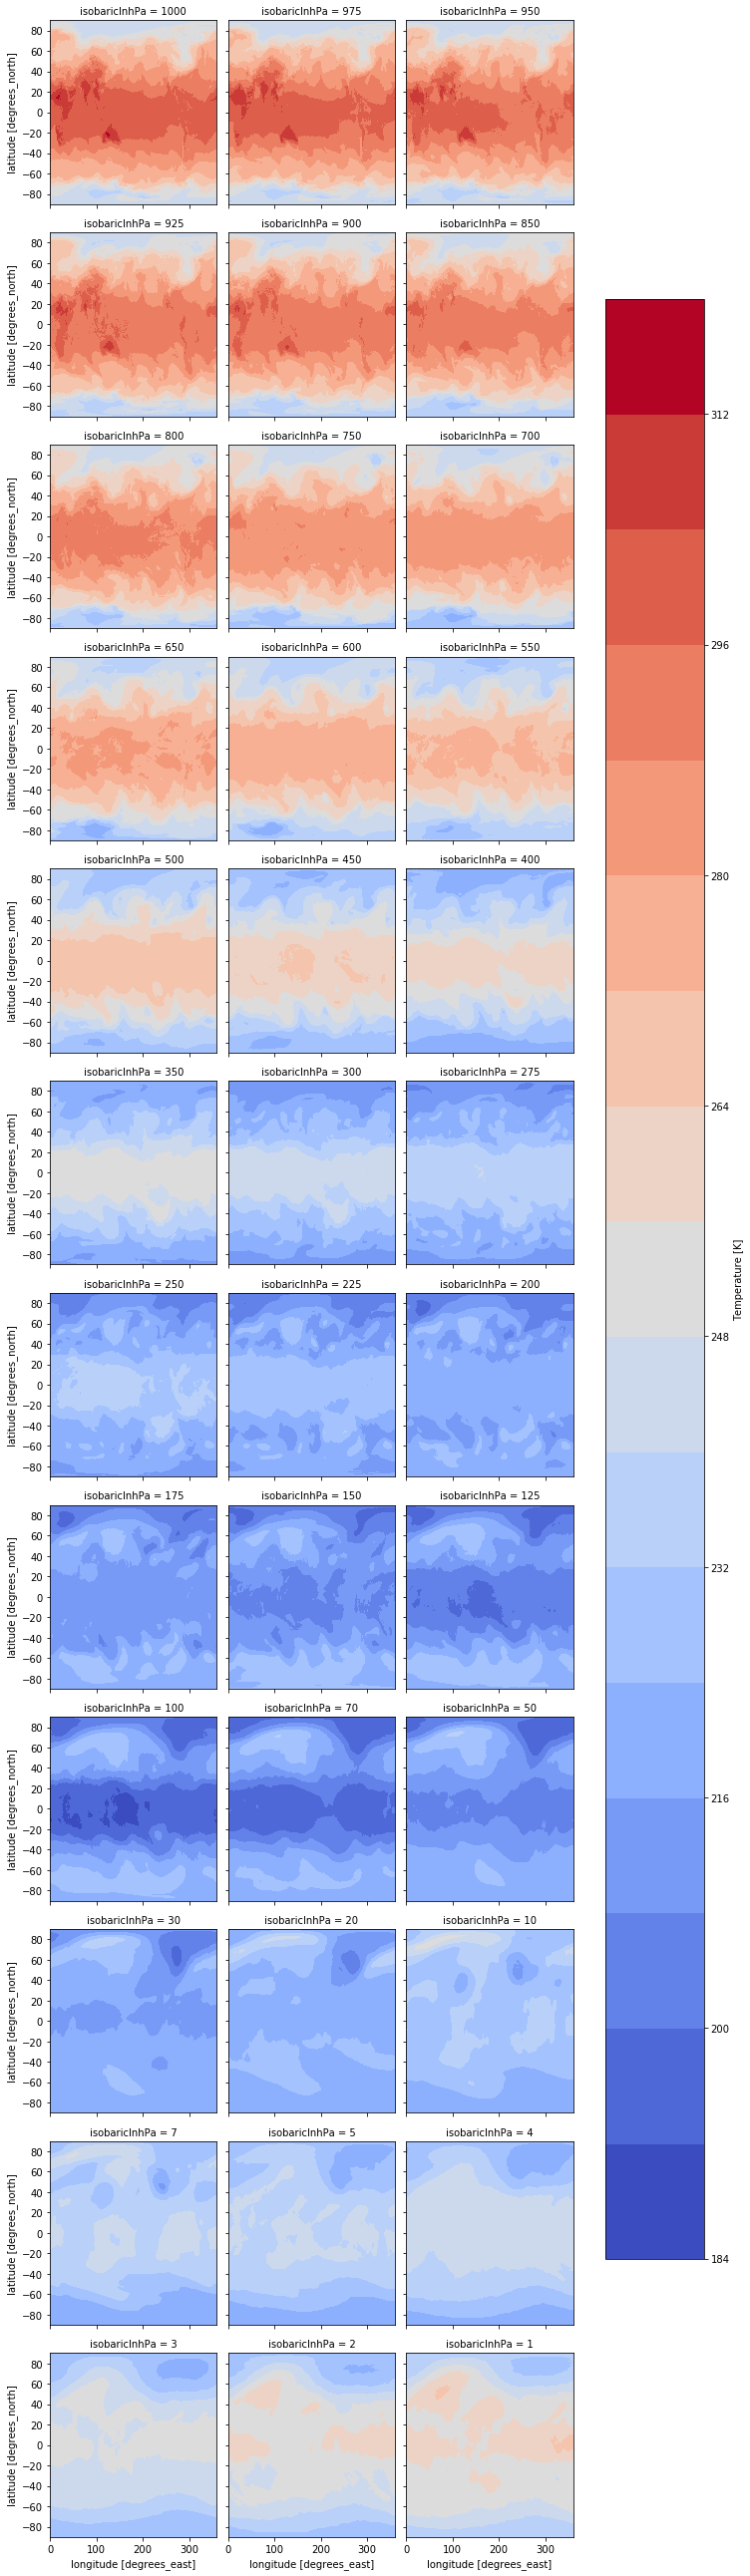

In [8]:
tset.plot(x="longitude", y="latitude", col="isobaricInhPa", col_wrap=3, cmap="coolwarm", levels=20)